# Autoencoding

## One-hot Encoder

In [1]:
from conx import *

Using Theano backend.


In [2]:
size = 5

In [3]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [4]:
net.connect()

In [5]:
net.compile(error='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

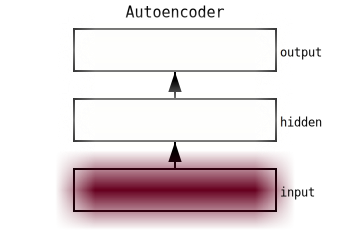

In [6]:
net

In [7]:
patterns = [one_hot(i, size) for i in range(size)]

In [8]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
net.dataset.load([(p,p) for p in patterns])

<IPython.core.display.Javascript object>

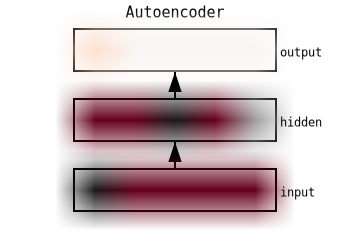

In [10]:
net

In [11]:
import time
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [12]:
net.dataset.summary()

Input Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)


In [13]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train error 0.55235 | train accuracy 0.80000 | validate% 0.20000
Epoch #  400 | train error 0.41667 | train accuracy 0.88000 | validate% 0.00000
Epoch #  600 | train error 0.32236 | train accuracy 0.88000 | validate% 0.40000
Epoch #  800 | train error 0.24311 | train accuracy 0.96000 | validate% 0.40000
Epoch # 1000 | train error 0.17773 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1200 | train error 0.13015 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1400 | train error 0.09755 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1506 | train error 0.08348 | train accuracy 1.00000 | validate% 1.00000


In [14]:
net.propagate(net.dataset.inputs[0])

[0.6001872420310974,
 0.36036840081214905,
 0.2085985690355301,
 0.08252657204866409,
 0.10484211146831512]

In [15]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [1.00,0.00,0.00,0.00,0.00] | [1.00,0.00,0.00,0.00,0.00] | [0.60,0.36,0.21,0.08,0.10] | X
1 | [0.00,1.00,0.00,0.00,0.00] | [0.00,1.00,0.00,0.00,0.00] | [0.04,0.94,0.02,0.02,0.00] | X
2 | [0.00,0.00,1.00,0.00,0.00] | [0.00,0.00,1.00,0.00,0.00] | [0.01,0.01,0.90,0.01,0.02] | X
3 | [0.00,0.00,0.00,1.00,0.00] | [0.00,0.00,0.00,1.00,0.00] | [0.01,0.04,0.02,0.87,0.02] | correct
4 | [0.00,0.00,0.00,0.00,1.00] | [0.00,0.00,0.00,0.00,1.00] | [0.01,0.02,0.03,0.05,0.94] | X
Total count: 25
Total percentage correct: 0.8


In [16]:
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

## MNIST Autoencoding

In [17]:
from conx import Network, Layer, FlattenLayer

In [18]:
net = Network("MNIST-Autoencoder")

In [19]:
net.add(Layer("input", (28,28,1)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden1", 25, activation="relu"))
net.add(Layer("hidden2", 25, activation="relu"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", (28,28,1), activation="sigmoid"))

In [20]:
net.connect()
net.compile(error="binary_crossentropy", optimizer="adam")

In [34]:
net.dataset.get('mnist')
net.dataset.set_targets_from_inputs()
net.dataset.targets.reshape(0, (28 * 28))
net.dataset.summary()

Input Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (784,)
   range  : (0.0, 1.0)


In [22]:
net.dashboard()

<IPython.core.display.Javascript object>

In [35]:
import numpy as np
from conx import get_form
image = np.random.rand(784).reshape((28, 28, 1))

In [36]:
get_form(net.propagate(image))

[[[numbers.Number, 1], 28], 28]

In [37]:
output = net.propagate_to_image("output", image)
output.size

(28, 28)

In [38]:
net.propagate_to("hidden3", image)

[0.2348758429288864,
 0.23463541269302368,
 0.0,
 0.0,
 0.0,
 0.3477630615234375,
 0.10352440923452377,
 0.0,
 0.0009437330299988389,
 0.10934100300073624,
 0.0,
 0.0,
 0.08767238259315491,
 0.4827045500278473,
 0.8497295379638672,
 0.9203288555145264,
 1.2686303853988647,
 0.0,
 0.29744455218315125,
 1.191908359527588,
 0.9009796380996704,
 0.0,
 0.12968222796916962,
 0.0,
 0.0]

In [39]:
net.dataset.slice(10)

In [40]:
get_form(net.dataset.train_targets[0])

[numbers.Number, 784]

In [41]:
net.train(accuracy=0.5, epochs=1000, report_rate=100, tolerance=.4)

Training...
Epoch #  100 | train error 0.17893 | train accuracy 0.81747 | validate% 0.00000
Epoch #  200 | train error 0.09399 | train accuracy 0.82487 | validate% 0.10000
Epoch #  233 | train error 0.07683 | train accuracy 0.82628 | validate% 0.50000


In [42]:
for i in range(10):
    net.propagate(net.dataset.inputs[i])

In [43]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [[[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],